# 前言

官方网站： https://www.manim.community/

这个教程是参考的是B站up的[PCC自由空间](https://space.bilibili.com/13075055)的视频。

B站连接：[Manim快速入门 | 中文教程 | 用python制作视频 | 3b1b风格的视频是怎样制作的](https://www.bilibili.com/video/BV17B4y1Q7G6/?share_source=copy_web&vd_source=d1a57027b2655bfb6dc177f8a435b353)

In [24]:
# 导入
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

# 基本用法
+ 场景在construct 方法中操作和控制
+ 用add直接添加元素

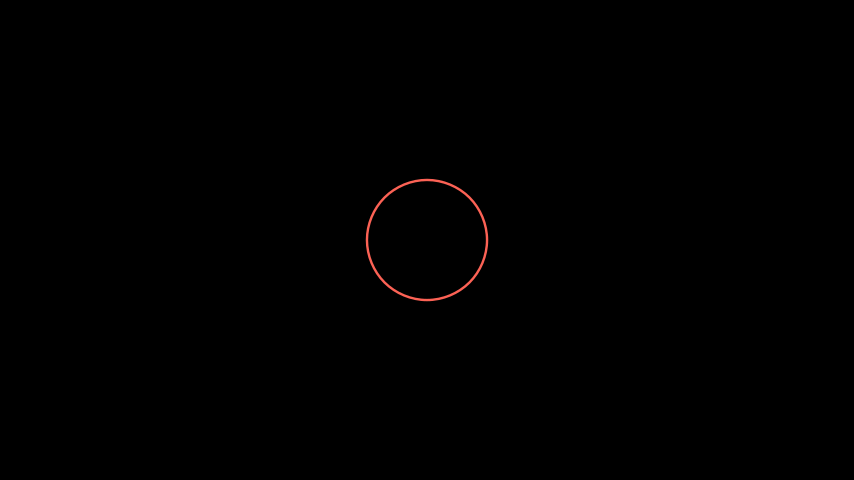

In [25]:
%%manim -ql -v WARNING View0

class View0(Scene):
    def construct(self):
      circle = Circle()
      self.add(circle)

+ 用 play 添加动画

In [26]:
%%manim -ql -v WARNING View1
class View1(Scene):
    def construct(self):
        circle = Circle()
        self.play(Create(circle))
        self.wait()

# 位置控制
+ shift
+ move_to
+ next_to
+ align_to

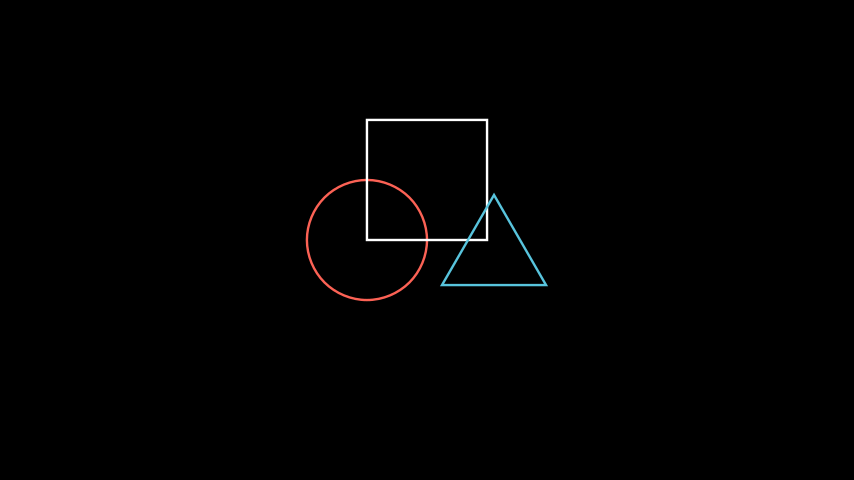

In [27]:
%%manim -ql -v WARNING View2

class View2(Scene):
    def construct(self):
        circle = Circle()
        triangle = Triangle()
        square = Square()

        circle.shift(LEFT)
        triangle.next_to(circle, RIGHT)
        square.move_to([0,1,0])

        self.add(circle, square, triangle)

小技巧：先添加坐标系，最后渲染视频的时候再删掉

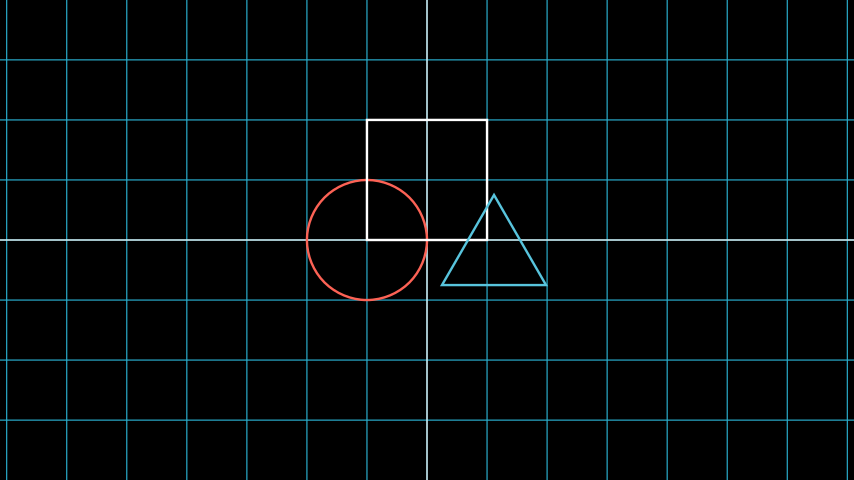

In [28]:
%%manim -ql -v WARNING View3

class View3(Scene):
    def construct(self):
        self.add(NumberPlane())

        circle = Circle()
        triangle = Triangle()
        square = Square()

        circle.shift(LEFT)
        triangle.next_to(circle, RIGHT)
        square.move_to([0,1,0])

        self.add(circle, square, triangle)

# 添加动画
两种方式：
+ 调用元素的animate方法
+ 全局对象

In [29]:
%%manim -ql -v WARNING View4

class View4(Scene):
    def construct(self):
        circle = Circle()
        triangle = Triangle()
        square = Square()

        self.play(circle.animate.shift(LEFT))
        self.play(triangle.animate.next_to(circle, RIGHT))
        self.play(square.animate.move_to([0,1,0]))

        vg = VGroup(circle, triangle, square)
        self.play(FadeOut(vg))
        self.wait()

与数据联动：

+ 借助ValueTracker

In [31]:
%%manim -ql -v WARNING View5

class View5(Scene):
    def construct(self):
        number_line = NumberLine(include_numbers=True)
        pointer = Vector(DOWN)
        tracker = ValueTracker(0)

        pointer.add_updater(
            lambda m: m.next_to(number_line.n2p(tracker.get_value()), UP)
        )

        self.add(number_line, pointer)
        self.play(tracker.animate.set_value(-6))
        self.wait()

In [32]:
%%manim -ql -v WARNING CauchyIntegralFormula

class CauchyIntegralFormula(Scene):
    def construct(self):
        formula = MathTex(r"[z^n]f(z) = \frac{1}{2\pi i}\oint_{\gamma} \frac{f(z)}{z^{n+1}}~dz")
        self.play(Write(formula), run_time=3)
        self.wait()

In [33]:
%%manim -ql -v WARNING TransformEquation

class TransformEquation(Scene):
    def construct(self):
        eq1 = MathTex("42 {{ a^2 }} + {{ b^2 }} = {{ c^2 }}")
        eq2 = MathTex("42 {{ a^2 }} = {{ c^2 }} - {{ b^2 }}")
        eq3 = MathTex(r"a^2 = \frac{c^2 - b^2}{42}")
        self.add(eq1)
        self.wait()
        self.play(TransformMatchingTex(eq1, eq2))
        self.wait()
        self.play(TransformMatchingShapes(eq2, eq3))
        self.wait()

In [14]:
%%manim -ql -v WARNING FormulaEmphasis

class FormulaEmphasis(Scene):
    def construct(self):
        product_formula = MathTex(
            r"\frac{d}{dx} f(x)g(x) =",
            r"f(x) \frac{d}{dx} g(x)",
            r"+",
            r"g(x) \frac{d}{dx} f(x)"
        )
        self.play(Write(product_formula))
        box1 = SurroundingRectangle(product_formula[1], buff=0.1)
        box2 = SurroundingRectangle(product_formula[3], buff=0.1)
        self.play(Create(box1))
        self.wait()
        self.play(Transform(box1, box2))
        self.wait()

In [17]:
%%manim -ql -v WARNING PlotExample

class PlotExample(Scene):
    def construct(self):
        plot_axes = Axes(
            x_range=[0, 1, 0.05],
            y_range=[0, 1, 0.05],
            x_length=9,
            y_length=5.5,
            axis_config={
                "numbers_to_include": np.arange(0, 1 + 0.1, 0.1),
                "font_size": 24,
            },
            tips=False,
        )

        y_label = plot_axes.get_y_axis_label("y", edge=LEFT, direction=LEFT, buff=0.4)
        x_label = plot_axes.get_x_axis_label("x")
        plot_labels = VGroup(x_label, y_label)

        plots = VGroup()
        for n in np.arange(1, 20 + 0.5, 0.5):
            plots += plot_axes.plot(lambda x: x**n, color=WHITE)
            plots += plot_axes.plot(
                lambda x: x**(1 / n), color=WHITE, use_smoothing=False
            )

        extras = VGroup()
        extras += plot_axes.get_horizontal_line(plot_axes.c2p(1, 1, 0), color=BLUE)
        extras += plot_axes.get_vertical_line(plot_axes.c2p(1, 1, 0), color=BLUE)
        extras += Dot(point=plot_axes.c2p(1, 1, 0), color=YELLOW)
        title = Title(
            r"Graphs of $y=x^{\frac{1}{n}}$ and $y=x^n (n=1, 1.5, 2, 2.5, 3, \dots, 20)$",
            include_underline=False,
            font_size=40,
        )
        
        self.play(Write(title))
        self.play(Create(plot_axes), Create(plot_labels), Create(extras))
        self.play(AnimationGroup(*[Create(plot) for plot in plots], lag_ratio=0.05))

In [18]:
%%manim -ql -v WARNING OpeningManim

class OpeningManim(Scene):
    def construct(self):
        title = Tex(r"This is some \LaTeX")
        basel = MathTex(r"\sum_{n=1}^\infty \frac{1}{n^2} = \frac{\pi^2}{6}")
        VGroup(title, basel).arrange(DOWN)
        self.play(
            Write(title),
            FadeIn(basel, shift=UP),
        )
        self.wait()

        transform_title = Tex("That was a transform")
        transform_title.to_corner(UP + LEFT)
        self.play(
            Transform(title, transform_title),
            LaggedStart(*[FadeOut(obj, shift=DOWN) for obj in basel]),
        )
        self.wait()

        grid = NumberPlane(x_range=(-10, 10, 1), y_range=(-6.0, 6.0, 1))
        grid_title = Tex("This is a grid")
        grid_title.scale(1.5)
        grid_title.move_to(transform_title)

        self.add(grid, grid_title)
        self.play(
            FadeOut(title),
            FadeIn(grid_title, shift=DOWN),
            Create(grid, run_time=3, lag_ratio=0.1),
        )
        self.wait()

        grid_transform_title = Tex(
            r"That was a non-linear function \\ applied to the grid"
        )
        grid_transform_title.move_to(grid_title, UL)
        grid.prepare_for_nonlinear_transform()
        self.play(
            grid.animate.apply_function(
                lambda p: p + np.array([np.sin(p[1]), np.sin(p[0]), 0])
            ),
            run_time=3,
        )
        self.wait()
        self.play(Transform(grid_title, grid_transform_title))
        self.wait()

# 将对应视频转化成为gif

In [37]:
!mkdir gif
from moviepy.editor import *

# choose the file you want
clip = (VideoFileClip("media/videos/manim_project/720p30/PlotExample.mp4"))
clip.write_gif("gif/PlotExample.gif")

MoviePy - Building file gif/PlotExample.gif with imageio.
